## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [140]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.graph_objs as go 
import plotly.express as px
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler  
from scipy.cluster.hierarchy import linkage, dendrogram 
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [82]:
df = pd.read_csv('Mall_Customers.csv', sep = ',')

In [84]:
df.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [14]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [16]:
# Obtener información sobre el tipo de datos y el total de valores en cada columna
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


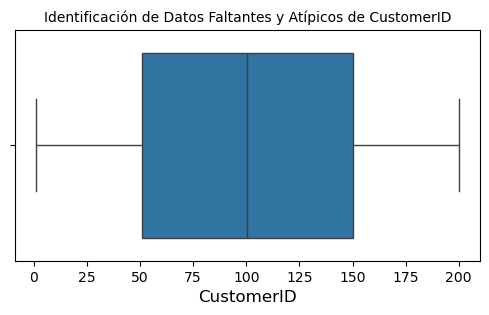

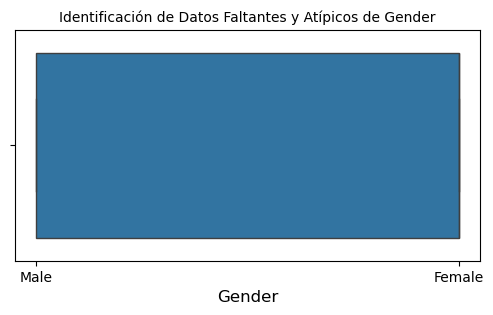

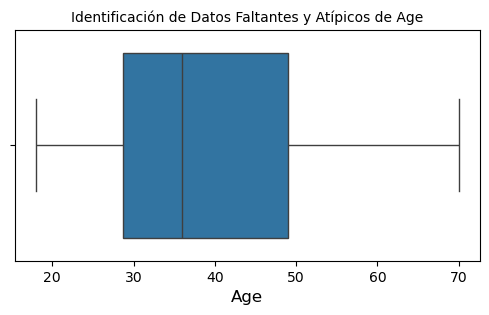

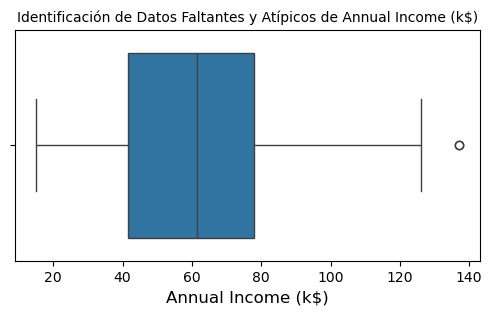

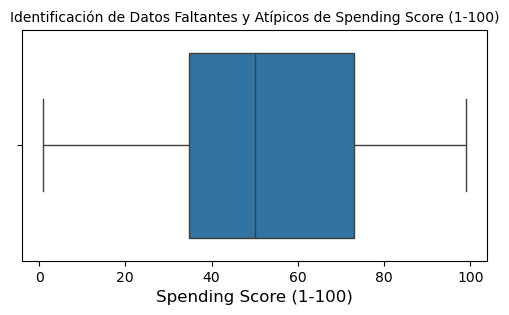

In [18]:
for col in df.columns:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Identificación de Datos Faltantes y Atípicos de {col}', fontsize=10)
    plt.xlabel(col, fontsize=12)
    plt.show()

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario


In [24]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Nota:** No se identificaron valores nulos ni vacios

Text(0.5, 1.0, 'Identificación de Datos Atípicos')

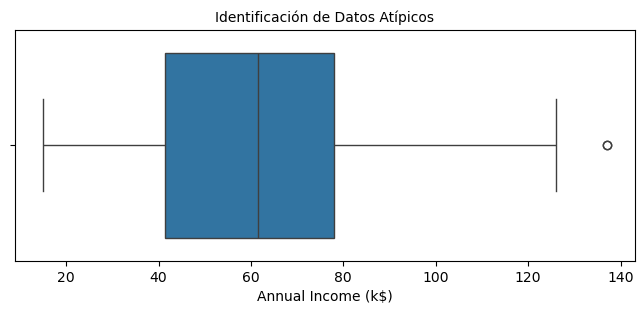

In [37]:
plt.figure(figsize=(8, 3))
sns.boxplot(x=df['Annual Income (k$)'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [86]:
nivel_minimo=0
nivel_maximo=130
Total_Atipicos=((df['Annual Income (k$)']<nivel_minimo)|(df['Annual Income (k$)']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 2


In [88]:
# Filtra Datos Atípicos
df=df[(df['Annual Income (k$)']<nivel_maximo)&(df['Annual Income (k$)']>nivel_minimo)]

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 0 to 197
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              198 non-null    int64 
 1   Gender                  198 non-null    object
 2   Age                     198 non-null    int64 
 3   Annual Income (k$)      198 non-null    int64 
 4   Spending Score (1-100)  198 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.3+ KB


## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características


####  Características de interes para el agrupamiento:
####  - Edad
####  - Ingresos anuales
####  - Puntuacion de gastos

In [122]:
df_modelo = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

In [124]:
df_modelo.head(40)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


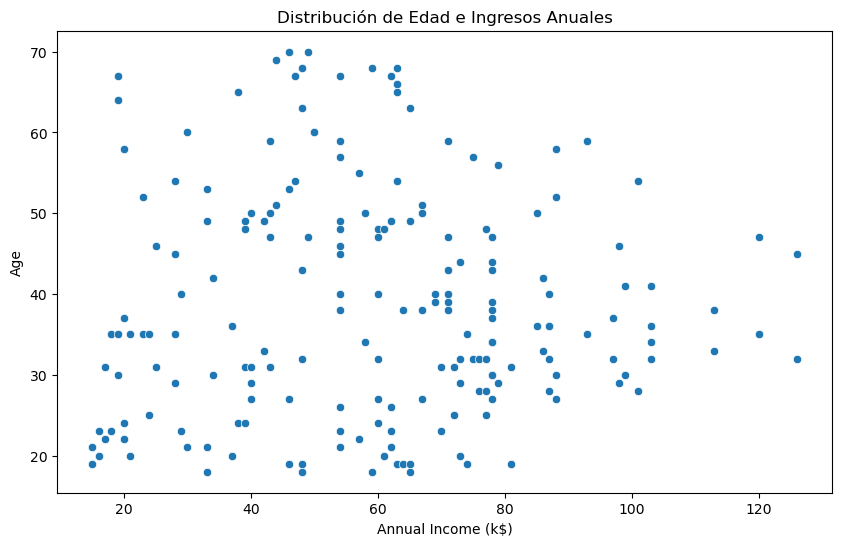

In [132]:
# Grafica antes del agrupamiento

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_modelo['Annual Income (k$)'], y=df['Age'])
plt.title('Distribución de Edad e Ingresos Anuales')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.show()

## 4. Entrenar el modelo configurando los diferentes hiperparámetros

In [120]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['CustomerID', 'Age', 'Annual Income (k$)','Spending Score (1-100)']])

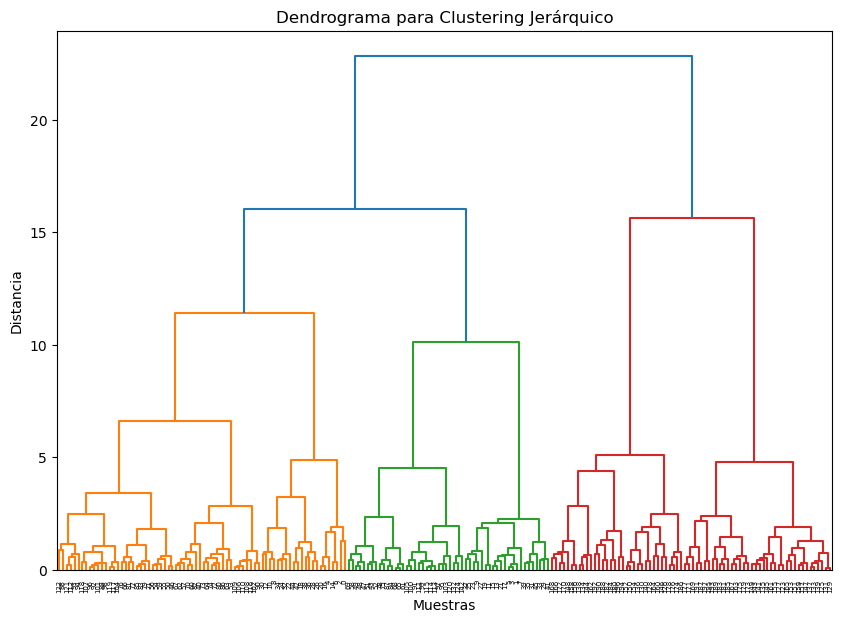

In [118]:
scaled_data = np.nan_to_num(scaled_data)  

linked = linkage(scaled_data, method='ward') 

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False) 
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()

In [116]:
df[['CustomerID', 'Age', 'Annual Income (k$)','Spending Score (1-100)']] = df[['CustomerID', 'Age', 'Annual Income (k$)','Spending Score (1-100)']].fillna(df[['CustomerID', 'Age', 'Annual Income (k$)','Spending Score (1-100)']].mean())

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['CustomerID', 'Age', 'Annual Income (k$)','Spending Score (1-100)']])  

model = AgglomerativeClustering(n_clusters=3, linkage='ward')  
labels = model.fit_predict(scaled_data)

# Coeficiente de Silhouette
sil_score = silhouette_score(scaled_data, labels)
print(f"Coeficiente de Silhouette: {sil_score}")

# Índice de Calinski-Harabasz
ch_score = calinski_harabasz_score(scaled_data, labels)
print(f"Índice de Calinski-Harabasz: {ch_score}")

# Índice de Davies-Bouldin
db_score = davies_bouldin_score(scaled_data, labels)
print(f"Índice de Davies-Bouldin: {db_score}")

Coeficiente de Silhouette: 0.309512231421964
Índice de Calinski-Harabasz: 94.01055234675238
Índice de Davies-Bouldin: 1.1410292917217058


## 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

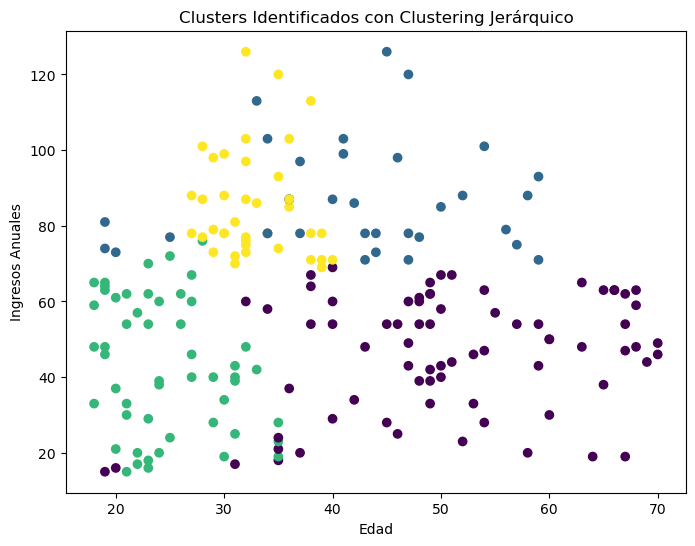

In [138]:
# Grafico de dispercion
model = AgglomerativeClustering(n_clusters=4)
df_modelo['Cluster'] = model.fit_predict(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(df_modelo['Age'], df_modelo['Annual Income (k$)'], c=df_modelo['Cluster'], cmap='viridis')
plt.title('Clusters Identificados con Clustering Jerárquico')
plt.xlabel('Edad')
plt.ylabel('Ingresos Anuales')
plt.show()

Silhouette Score: 0.39190248896720503


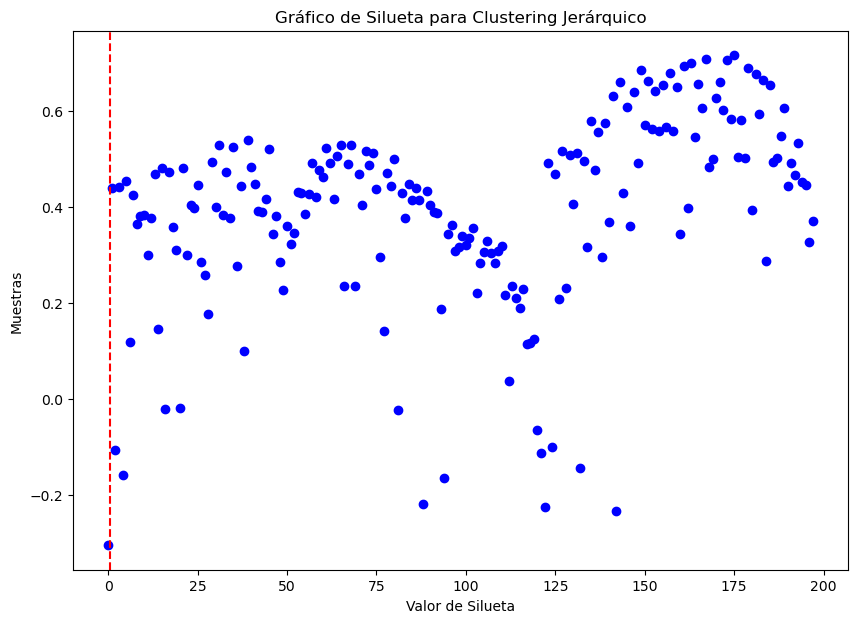

In [142]:
# Calcular la silueta
silhouette_avg = silhouette_score(scaled_data, model.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Mostrar el gráfico de silueta
sample_silhouette_values = silhouette_samples(scaled_data, model.labels_)
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(sample_silhouette_values, 'bo')
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_title("Gráfico de Silueta para Clustering Jerárquico")
ax.set_xlabel("Valor de Silueta")
ax.set_ylabel("Muestras")
plt.show()

## 7. Interpretar, analizar y documentar los resultados obtenidos

Analizando el coeficiente de Silhouette tiene un valor de 0.3095 lo cual sugiere que en general las muestras estan asignadas de forma razonable a sus clusters, pero podria haber margen de mejora siempre y cuando el valor mas cercano a 1 indicara una asignacion más clara y definida, mientars el indice de Calinski Harabasz tiene un valor de 94.0105 lo cual es relativamente alto, lo que indica que los clusters están bien separados y las observaciones dentro de cada cluster son bastante similares y porotro lado el indice de Davies-Bouldin tiene un valor de 1.1410 lo que quiere decir que los clusters estan razonablemente separados, pero podria haber algunos clusters que esten mas cercanos entre si que podria ser lo ideal.
En el algoritmo de clustering se identifican grupos de datos similares, sin embargo, la calidad de la agrupacion no es uniforme para todas las muestras ya que algunas muestras podrian estar mejor asignadas a otros clusters, tambien existen muestras que podrian ser consideradas ruidos ya que sus coeficientes de silueta son muy bajos o incluso negativos. Los cluster en verde agrupan a individuos relativamente jovenes con ingresos moderados, los cluster en amarillo agrupan a individuos con una amplia variedad de edades y altos ingresos y los cluster en morado agrupan a individuos de mediana edad con ingresos moderados.